In [6]:
!dir

 Volume in drive C is OS
 Volume Serial Number is ECFF-C11A

 Directory of C:\Github\Linear-Equation-Solver

08-07-2019  03:45    <DIR>          .
08-07-2019  03:45    <DIR>          ..
08-07-2019  03:31    <DIR>          .ipynb_checkpoints
08-07-2019  03:36    <DIR>          dataset
08-07-2019  03:45           205,984 Dataset_creation less images.ipynb
08-07-2019  03:20           199,769 Dataset_creation.ipynb
07-07-2019  20:20           199,556 division and equals merging.ipynb
07-07-2019  20:20            13,910 division_testing.jpg
08-07-2019  03:32           170,417 Final extracting individual symbols.ipynb
07-07-2019  20:20            25,167 hard_test.jpg
08-07-2019  03:02         2,356,472 model.h5
08-07-2019  03:02             3,758 model.json
07-07-2019  20:20            36,177 random_tests.jpg
07-07-2019  20:20                29 README.md
07-07-2019  20:20            20,800 simple_equation.jpg
08-07-2019  03:07           257,761 testing letter detection.ipynb
08-07-2019  01:5

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import os
import cv2 as cv
import pandas as pd
from sklearn.model_selection import  train_test_split
from keras import models
from keras import layers
from keras.utils import to_categorical
import tensorflow as tf
import keras

Using TensorFlow backend.


In [44]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2440554860965091825
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3078304563
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15462966339596839857
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [46]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [45]:
config = tf.ConfigProto( device_count = {'GPU': 0} )
sess = tf.Session(config=config)
keras.backend.set_session(sess)

In [36]:
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# confirm Keras sees the GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

In [2]:
def disp_img(img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()

In [5]:
mpl.rcParams['figure.dpi']= 180

In [6]:
data_dir = './dataset'
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', 'x', 'div', '=']

In [7]:
num_classes = len(labels)
print(f'Number of classes = {num_classes}')

Number of classes = 15


In [8]:
dataset = []

In [9]:
for label in labels:
    count = 0
    path = os.path.join(data_dir, label)
    label_val = labels.index(label)
    for img in os.listdir(path):
        count+=1
        if count > 792:
            break
        pad = 1
        gray = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
        blurred = cv.GaussianBlur(gray, (3, 3), 5)
        thresh = cv.adaptiveThreshold(blurred, 255, 0, 1, 115, 1)
        padded = cv.copyMakeBorder(thresh, top=pad, bottom=pad, left=pad, right=pad, borderType= cv.BORDER_CONSTANT, value=[0,0,0] )
        dataset.append([padded, label_val])

In [11]:
len(dataset)

11880

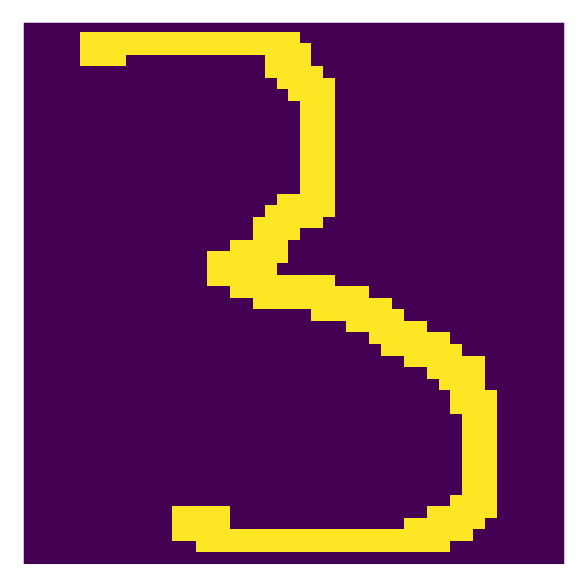

In [28]:
disp_img(dataset[2500][0])

In [29]:
labels[dataset[2500][1]]

'3'

In [17]:
df = pd.DataFrame(dataset, columns=list('Xy'))
df = df.sample(frac=1).reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 2 columns):
X    11880 non-null object
y    11880 non-null int64
dtypes: int64(1), object(1)
memory usage: 185.7+ KB


In [19]:
df.head(100)

,X,y
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",13
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",10
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",12
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",13
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",12
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4


In [20]:
X = df.X
y = df.y

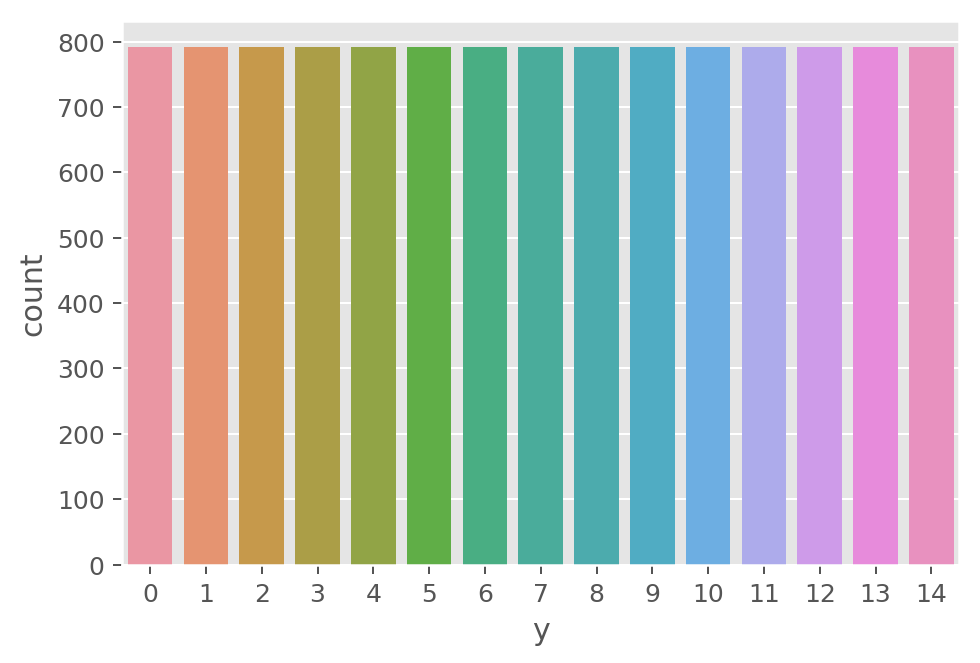

In [21]:
g = sns.countplot(y)

In [22]:
X.shape

(11880,)

In [23]:
X = np.stack(X)

In [24]:
X = X/255.0

In [25]:
X = X.reshape(-1, 47, 47, 1)

In [26]:
y = to_categorical(y, num_classes = num_classes)

In [27]:
X.shape, y.shape

((11880, 47, 47, 1), (11880, 15))

In [28]:
type(X)

numpy.ndarray

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (47, 47, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation = 'softmax'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 45, 45, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          36928     
__________

In [49]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_data = (X_val, y_val), verbose=1)

Train on 10692 samples, validate on 1188 samples
Epoch 1/20
10692/10692 [==============================] - 32s 3ms/step - loss: 1.1304 - acc: 0.6502 - val_loss: 0.3962 - val_acc: 0.8872
Epoch 2/20
10692/10692 [==============================] - 31s 3ms/step - loss: 0.4182 - acc: 0.8786 - val_loss: 0.2178 - val_acc: 0.9343
Epoch 3/20
10692/10692 [==============================] - 32s 3ms/step - loss: 0.2753 - acc: 0.9210 - val_loss: 0.1726 - val_acc: 0.9520
Epoch 4/20
10692/10692 [==============================] - 34s 3ms/step - loss: 0.2236 - acc: 0.9343 - val_loss: 0.1299 - val_acc: 0.9655
Epoch 5/20
10692/10692 [==============================] - 33s 3ms/step - loss: 0.1810 - acc: 0.9484 - val_loss: 0.1084 - val_acc: 0.9731
Epoch 6/20
10692/10692 [==============================] - 32s 3ms/step - loss: 0.1372 - acc: 0.9602 - val_loss: 0.1129 - val_acc: 0.9739
Epoch 7/20
10692/10692 [==============================] - 32s 3ms/step - loss: 0.1294 - acc: 0.9613 - val_loss: 0.0960 - val_acc:

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

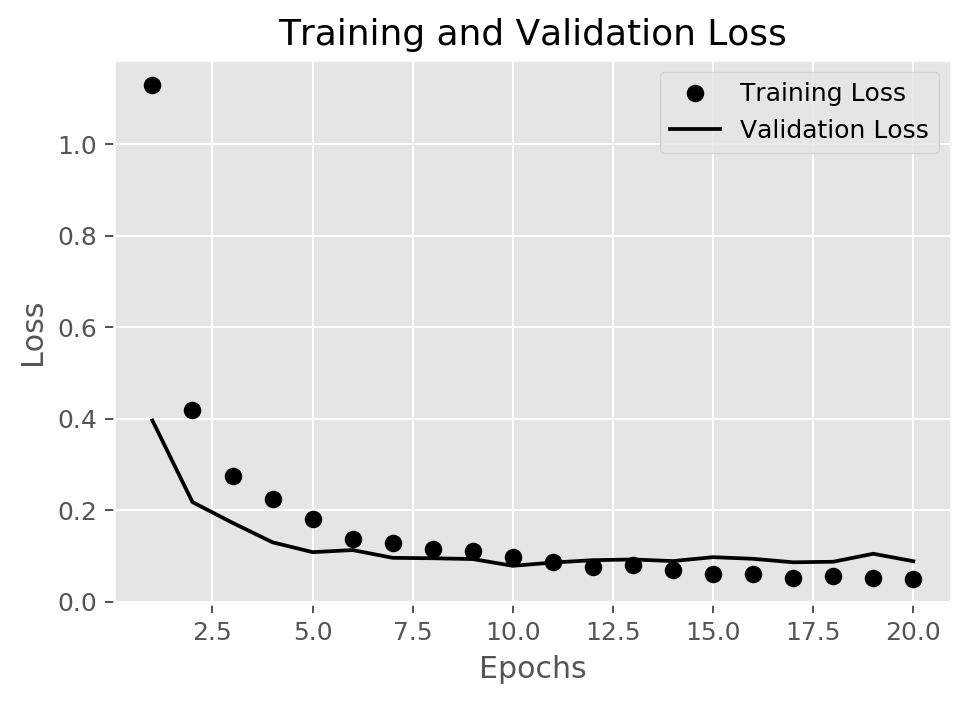

In [52]:
epochs = range(1, 21)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

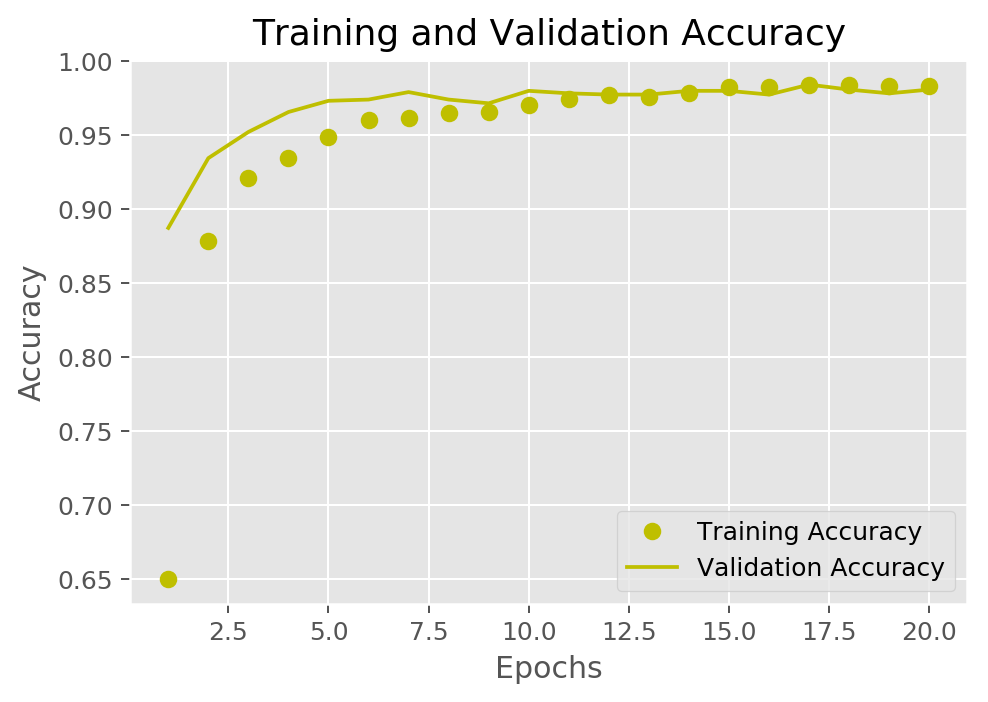

In [53]:
plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [ ]:
results = model.predict(X_test)

In [ ]:
results = np.argmax(results, axis = 1)
results = pd.Series(results, name = 'Label')

In [ ]:
results

In [54]:
model_json = model.to_json()

with open("model2.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model2.h5")